# *필요 라이브러리

In [1]:
#필요 라이브러리, 패키지 불러오기
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency

In [2]:
#python에서 이상한 문자 나올 때 warnings import 하여 방지하기
import warnings
warnings.filterwarnings('ignore')
#plot 환경설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline
#음수 표시
matplotlib.rc('axes', unicode_minus=False)

# 1. 데이터 불러오기 및 병합

In [3]:
df1 = pd.read_csv('01 Patient_Surgery_Data.csv')
df1.head(3)

,환자ID,수술기법,수술시간,수술실패여부,신장,연령,재발여부,체중,헤모글로빈수치,환자통증정도,통증기간(월),혈액형,입원일,퇴원일,수술일
0,1052PT,TELD,30.0,0,174,34,0,75.0,15.1,7,0.2,RH+O,2012-04-01,2012-04-02,2012-04-02
1,1056PT,TELD,70.0,0,172,19,0,70.0,16.0,7,5.0,RH+O,2012-04-08,2012-04-11,2012-04-09
2,1093PT,TELD,45.0,0,177,28,0,68.0,15.0,5,24.0,RH+A,2012-05-14,2012-05-14,2012-05-14


In [4]:
df2 = pd.read_csv('02 Patient_Diagnosis_Data.csv')
df2.head(3)

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,종양진행여부,직업,체중,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),입원일,퇴원일
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,사무직,75.0,15.1,0,7,1,0.2,2012-04-01,2012-04-02
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,군인,70.0,16.0,0,7,0,5.0,2012-04-08,2012-04-11
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,NaN,68.0,15.0,0,5,0,24.0,2012-05-14,2012-05-14


In [5]:
df3 = pd.read_csv('03 Medical_Image_Data.csv')
df3.head(3)

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


In [6]:
df1.columns

Index(['환자ID', '수술기법', '수술시간', '수술실패여부', '신장', '연령', '재발여부', '체중', '헤모글로빈수치',
       '환자통증정도', '통증기간(월)', '혈액형', '입원일', '퇴원일', '수술일'],
      dtype='object')

In [7]:
df2.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)',
       '입원일', '퇴원일'],
      dtype='object')

In [8]:
df3.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [9]:
df_merge = pd.merge(df1, df2, on=['환자ID', '신장', '연령', '체중', '헤모글로빈수치', '환자통증정도', '통증기간(월)', '입원일', '퇴원일'])
df_merge.head(3)

,환자ID,수술기법,수술시간,수술실패여부,신장,연령,재발여부,체중,헤모글로빈수치,환자통증정도,...,스테로이드치료,신부전여부,심혈관질환,암발병여부,우울증여부,입원기간,종양진행여부,직업,혈전합병증여부,흡연여부
0,1052PT,TELD,30.0,0,174,34,0,75.0,15.1,7,...,0,0,0,0,0,1,0,사무직,0,1
1,1056PT,TELD,70.0,0,172,19,0,70.0,16.0,7,...,1,0,0,0,0,1,0,군인,0,0
2,1093PT,TELD,45.0,0,177,28,0,68.0,15.0,5,...,0,0,0,1,1,1,0,NaN,0,0


## 1.1 최종으로 병합된 데이터프레임 : df

In [10]:
df = pd.merge(df_merge, df3, on=['환자ID'])
df.head(3)

,환자ID,수술기법,수술시간,수술실패여부,신장,연령,재발여부,체중,헤모글로빈수치,환자통증정도,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1052PT,TELD,30.0,0,174,34,0,75.0,15.1,7,...,0,49.7,27.6,1.2,0,NaN,2155.3,4,Middle,0
1,1056PT,TELD,70.0,0,172,19,0,70.0,16.0,7,...,0,36.3,4.5,7.3,0,NaN,2143.1,4,Middle,0
2,1093PT,TELD,45.0,0,177,28,0,68.0,15.0,5,...,0,41.3,17.4,13.4,0,NaN,1868.7,4,Down,0


In [11]:
df.shape

(1894, 51)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   수술기법                    1813 non-null   object 
 2   수술시간                    1840 non-null   float64
 3   수술실패여부                  1894 non-null   int64  
 4   신장                      1894 non-null   int64  
 5   연령                      1894 non-null   int64  
 6   재발여부                    1894 non-null   int64  
 7   체중                      1894 non-null   float64
 8   헤모글로빈수치                 1893 non-null   float64
 9   환자통증정도                  1894 non-null   int64  
 10  통증기간(월)                 1890 non-null   float64
 11  혈액형                     1894 non-null   object 
 12  입원일                     1894 non-null   object 
 13  퇴원일                     1894 non-null   object 
 14  수술일                     1894 non-null   

### df의 중복 행 확인

중복된 행은 없는 것으로 확인

In [13]:
df[df.duplicated()]

,환자ID,수술기법,수술시간,수술실패여부,신장,연령,재발여부,체중,헤모글로빈수치,환자통증정도,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증


# 2. 데이터 전처리

## 2.1 결측값 확인

수술기법, 수술시간, 헤모글로빈 수치, 통증기간(월), ODI, 가족력, 직업, 지방축적도, PI, PT, Seg Angle(raw), 골밀도, 디스크 단면적에서 결측값이 존재하는 것을 확인.

In [14]:
df.isnull().sum()

환자ID                         0
수술기법                        81
수술시간                        54
수술실패여부                       0
신장                           0
연령                           0
재발여부                         0
체중                           0
헤모글로빈수치                      1
환자통증정도                       0
통증기간(월)                      4
혈액형                          0
입원일                          0
퇴원일                          0
수술일                          0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
심혈관질환                        0
암발병여부                        0
우울증여부                        0
입원기간                         0
종양진행여부  

### 1) 수술기법
명목형 변수이므로, 최빈값 대체

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
df['수술기법'].isnull().sum() #수술기법 결측치 행의 개수가 81개

81

In [17]:
print(df['수술기법'].unique())
print(df['수술기법'].value_counts())

['TELD' 'IELD' nan]
수술기법
TELD    1673
IELD     140
Name: count, dtype: int64


In [18]:
df['수술기법'].fillna('TELD', inplace = True) #수술기법 결측치 최빈값인 'TELD'로 채움
df['수술기법'].isnull().sum()

0

### 2) 수술시간  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하므로 평균값 대체

Shapiro-Wilk Test statistic: 0.9676291346549988, p-value: 6.62016425668799e-20


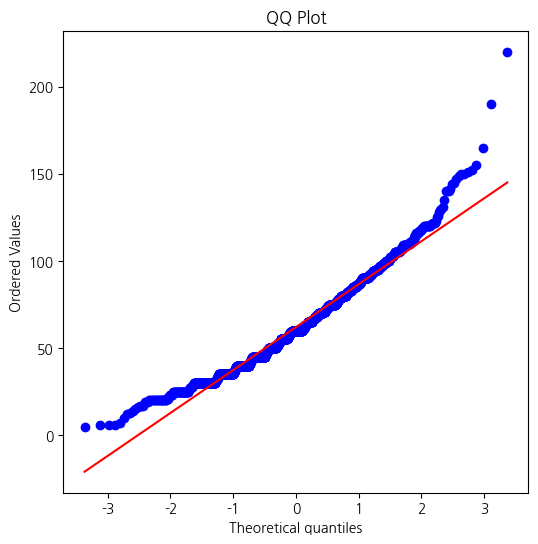

In [19]:
from scipy import stats

clean_data = df['수술시간'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [20]:
df['수술시간'].fillna(df['수술시간'].mean(), inplace=True)
df['수술시간'].isnull().sum()

0

### 3) 헤모글로빈수치  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하므로 평균값 대체

Shapiro-Wilk Test statistic: 0.9953117966651917, p-value: 1.1770710443670396e-05


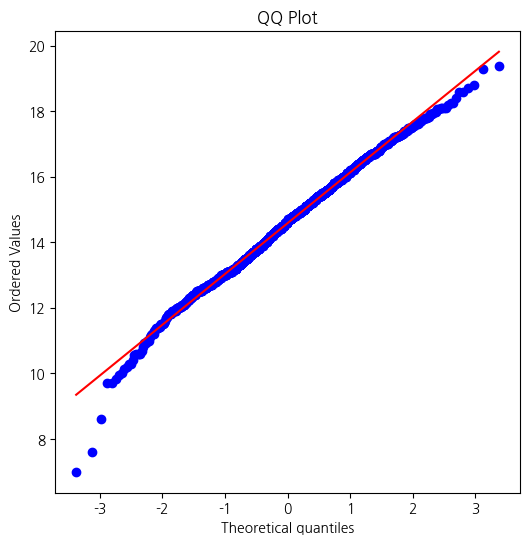

In [21]:
clean_data = df['헤모글로빈수치'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [22]:
df['헤모글로빈수치'].fillna(df['헤모글로빈수치'].mean(), inplace=True)
df['헤모글로빈수치'].isnull().sum()

0

### 4) 통증기간(월)  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하지 않으므로, 중앙값을 통한 대체

Shapiro-Wilk Test statistic: 0.26820456981658936, p-value: 0.0


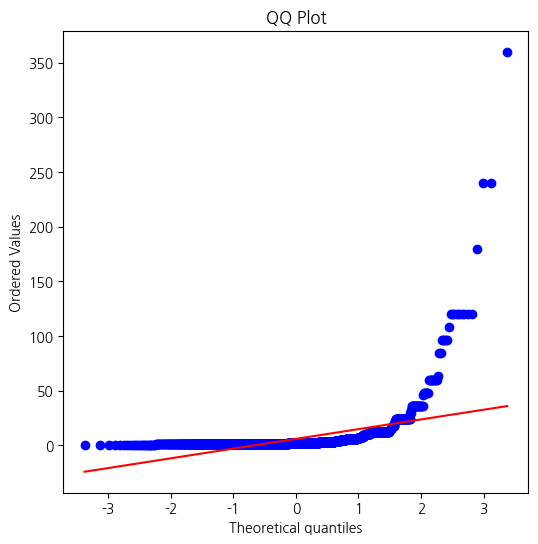

In [23]:
clean_data = df['통증기간(월)'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

통증기간(월)별 환자 수를 그래프를 통해 확인한 결과, 꼬리가 우측으로 길게 늘어져 있는 것을 확인할 수 있음.

In [24]:
print("중앙값 : ", df['통증기간(월)'].median())

중앙값 :  2.0


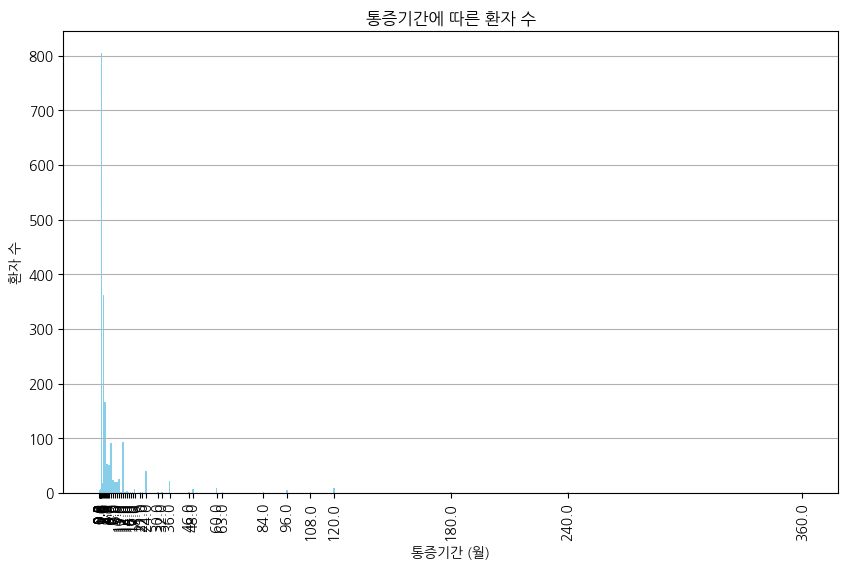

In [25]:
# 통증기간에 따라 데이터 프레임 정렬
df_sorted = df.sort_values(by='통증기간(월)')

# 통증기간별 환자 수 세기
pain_duration_counts = df_sorted['통증기간(월)'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(pain_duration_counts.index, pain_duration_counts.values, color='skyblue')
plt.xlabel('통증기간 (월)')
plt.ylabel('환자 수')
plt.title('통증기간에 따른 환자 수')
plt.xticks(pain_duration_counts.index,rotation=90)
plt.grid(axis='y')
plt.show()

In [26]:
df['통증기간(월)'].fillna(df['통증기간(월)'].median(), inplace=True)
df['통증기간(월)'].isnull().sum()

0

### 5) ODI  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하므로, 평균값 대체
* 그러나 ODI는 결측치가 전체의 약 74% 정도이므로 컬럼 제거 가능성 존재.

Shapiro-Wilk Test statistic: 0.9833627939224243, p-value: 3.832538641290739e-05


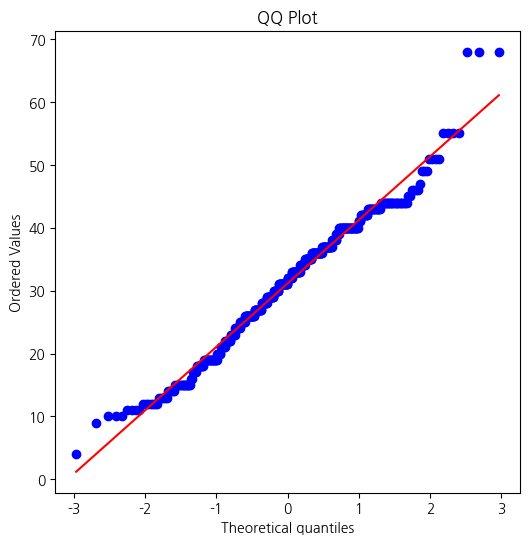

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

clean_data = df['ODI'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [28]:
df['ODI'].fillna(df['ODI'].mean(), inplace=True)
df['ODI'].isnull().sum()

0

### 6) 가족력  
명목형 변수이므로, 최빈값 대체

In [29]:
df['가족력'].value_counts()

가족력
0.0    1751
1.0      92
Name: count, dtype: int64

In [30]:
df['가족력'].fillna(df['가족력'].mode()[0], inplace=True)
df['가족력'].isnull().sum()

0

### 7) 직업
명목형 변수이므로, 최빈값 대체가 적절하나 결측행들의 공통점이 있을 것으로 판단되어 'Unknown'으로 대체

In [31]:
print("결측값 :", df['직업'].isnull().sum())
print(df['직업'].value_counts())

결측값 : 415
직업
사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
의료직       40
농업        40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: count, dtype: int64


In [32]:
df['직업'].fillna('Unknown', inplace=True)
df['직업'].isnull().sum()

0

### 8) 지방축적도  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하지 않으므로, 중앙값을 통한 대체

In [33]:
print("결측값 :", df['지방축적도'].isnull().sum())

결측값 : 3


Shapiro-Wilk Test statistic: 0.23043185472488403, p-value: 0.0


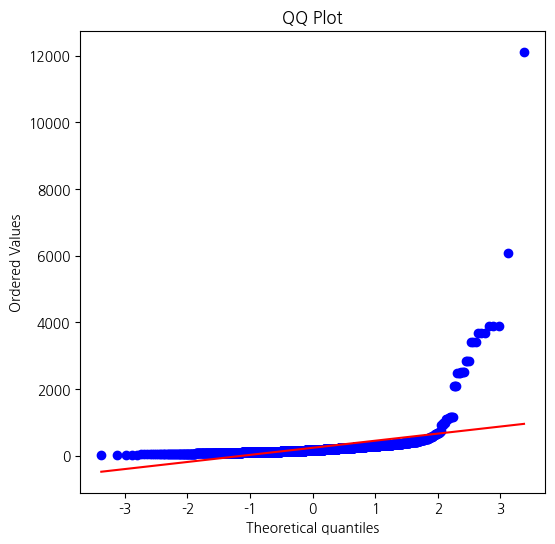

In [34]:
clean_data = df['지방축적도'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

지방축적도별 환자 수를 그래프를 통해 확인한 결과, 꼬리가 우측으로 길게 늘어져 있는 것을 확인할 수 있음.

In [35]:
df['지방축적도'].median()

169.1

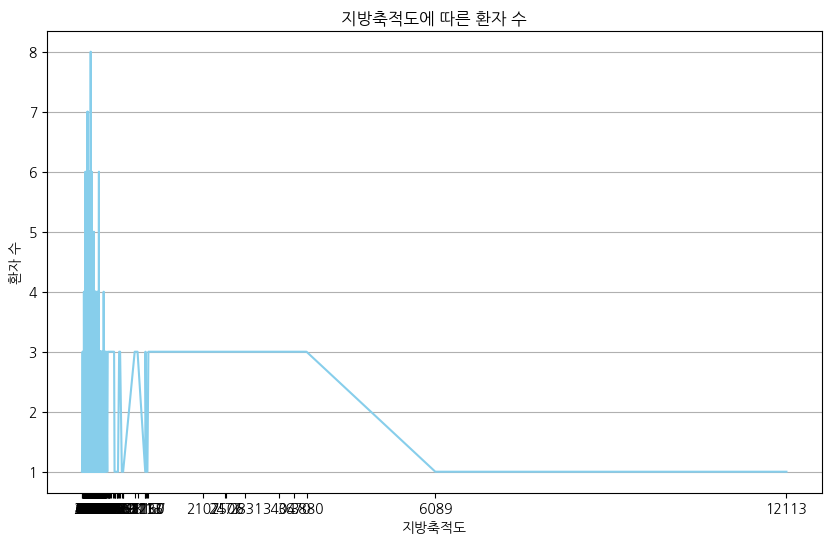

In [36]:
df_sorted = df.sort_values(by='지방축적도')
pain_duration_counts = df_sorted['지방축적도'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(pain_duration_counts.index, pain_duration_counts.values, color='skyblue')
plt.xlabel('지방축적도')
plt.ylabel('환자 수')
plt.title('지방축적도에 따른 환자 수')
plt.xticks(pain_duration_counts.index)
plt.grid(axis='y')
plt.show()

In [37]:
df['지방축적도'].fillna(df['지방축적도'].mode()[0], inplace=True)
df['지방축적도'].isnull().sum()

0

### 9) PI  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하지 않으므로, 중앙값을 통한 대체

In [38]:
print("결측치 수 :", df['PI'].isnull().sum())

결측치 수 : 4


Shapiro-Wilk Test statistic: 0.3011665344238281, p-value: 0.0


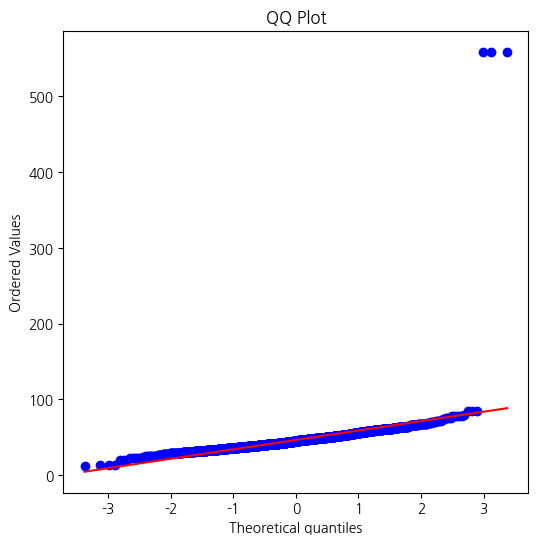

In [39]:
clean_data = df['PI'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

PI별 환자 수를 그래프를 통해 확인한 결과, 꼬리가 우측으로 길게 늘어져 있는 것을 확인할 수 있음.  
정규성을 만족하지 못하는 것은 이상치로 인식되는 599값의 영향일 가능성이 크며, 이 값을 제거한 뒤 다시 확인해보는 것이 옳은 것으로 생각된다.

In [40]:
df['PI'].median()

45.1

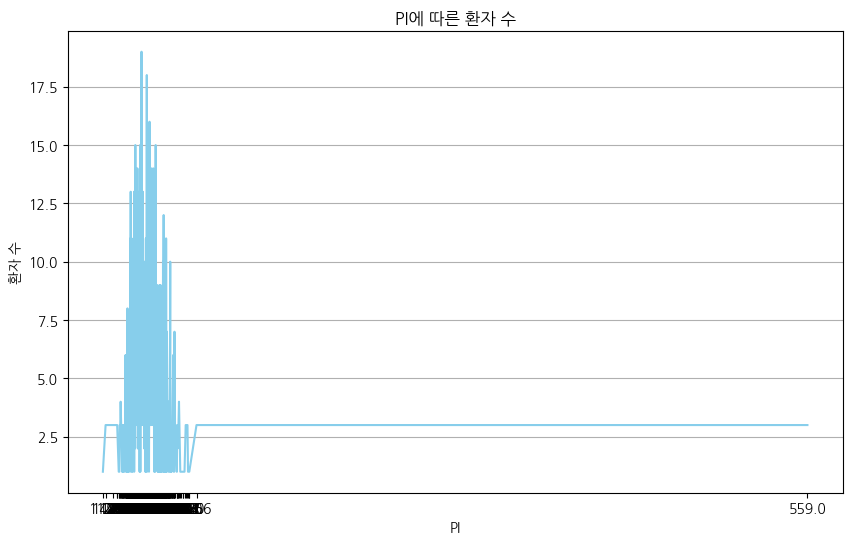

In [41]:
df_sorted = df.sort_values(by='PI')
pain_duration_counts = df_sorted['PI'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(pain_duration_counts.index, pain_duration_counts.values, color='skyblue')
plt.xlabel('PI')
plt.ylabel('환자 수')
plt.title('PI에 따른 환자 수')
plt.xticks(pain_duration_counts.index)
plt.grid(axis='y')
plt.show()

In [42]:
df['PI'].fillna(df['PI'].median(), inplace=True)
df['PI'].isnull().sum()

0

### 10) PT  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하므로, 평균값 대체

In [43]:
print("결측치 수 :", df['PT'].isnull().sum())

결측치 수 : 4


Shapiro-Wilk Test statistic: 0.987747073173523, p-value: 1.3395833053930772e-11


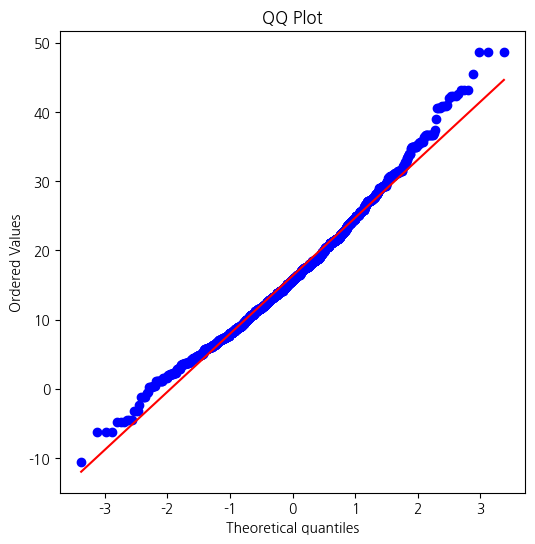

In [44]:
clean_data = df['PT'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [45]:
df['PT'].fillna(df['PT'].mean(), inplace=True)
df['PT'].isnull().sum()

0

### 11) Seg Angle(raw)  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하지 않으므로, 중앙값을 통한 대체

In [46]:
print("결측치 수 :", df['Seg Angle(raw)'].isnull().sum())

결측치 수 : 1


Shapiro-Wilk Test statistic: 0.7767412066459656, p-value: 4.203895392974451e-45


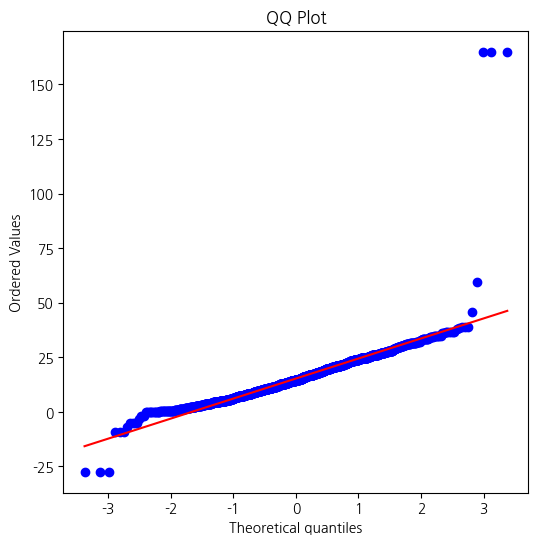

In [47]:
clean_data = df['Seg Angle(raw)'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

PI별 환자 수를 그래프를 통해 확인한 결과, 꼬리가 우측으로 길게 늘어져 있는 것을 확인할 수 있음.  
양 끝단의 일부 값들은 정규성 가정에 영향을 미치는 것으로 보이며, 후에 이상치로 판단되어 제거될 가능성이 있다.

In [48]:
df['Seg Angle(raw)'].median()

14.5

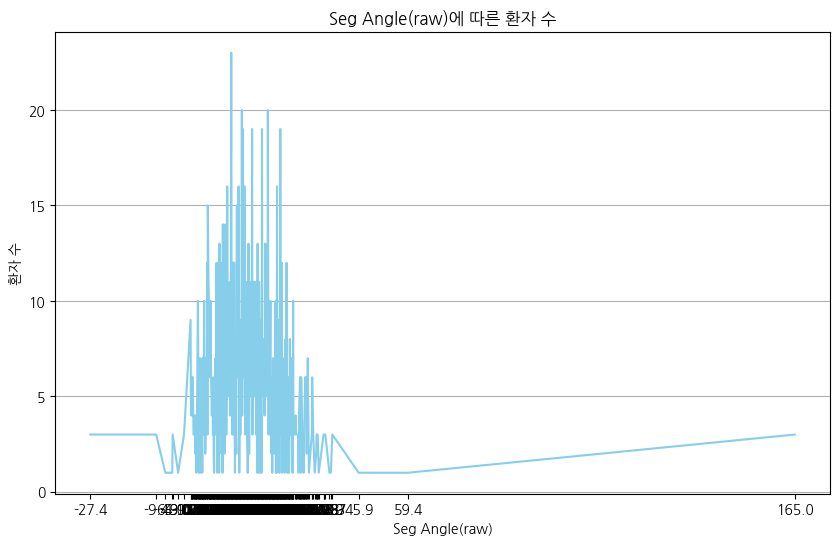

In [49]:
df_sorted = df.sort_values(by='Seg Angle(raw)')
pain_duration_counts = df_sorted['Seg Angle(raw)'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(pain_duration_counts.index, pain_duration_counts.values, color='skyblue')
plt.xlabel('Seg Angle(raw)')
plt.ylabel('환자 수')
plt.title('Seg Angle(raw)에 따른 환자 수')
plt.xticks(pain_duration_counts.index)
plt.grid(axis='y')
plt.show()

In [50]:
df['Seg Angle(raw)'].fillna(df['Seg Angle(raw)'].median(), inplace=True)
df['Seg Angle(raw)'].isnull().sum()

0

### 12) 골밀도  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하므로, 평균값 대체

In [51]:
print("결측치 수 :", df['골밀도'].isnull().sum())

결측치 수 : 896


Shapiro-Wilk Test statistic: 0.9344106912612915, p-value: 1.5837834933683888e-20


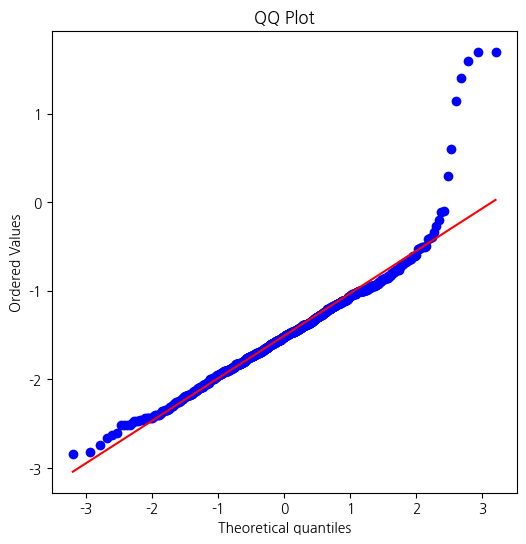

In [52]:
clean_data = df['골밀도'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [53]:
df['골밀도'].fillna(df['골밀도'].mean(), inplace=True)
df['골밀도'].isnull().sum()

0

### 13) 디스크단면적  
이산형 변수이므로, 정규분포를 따르는지 유무에 따른 대체방법 결정  
=> 정규성 가정을 만족하므로, 평균값 대체

In [54]:
print("결측치 수 :", df['디스크단면적'].isnull().sum())

결측치 수 : 1


Shapiro-Wilk Test statistic: 0.9894697070121765, p-value: 1.6644179090530287e-10


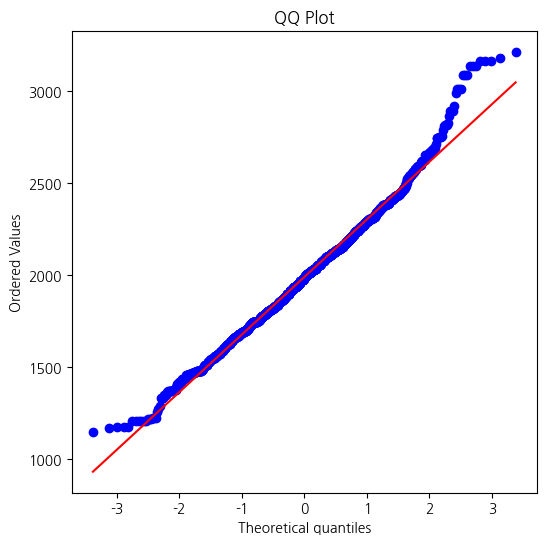

In [55]:
clean_data = df['디스크단면적'].dropna()  # 결측치 제거
shapiro_test = stats.shapiro(clean_data)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(clean_data, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [56]:
df['디스크단면적'].fillna(df['디스크단면적'].mean(), inplace=True)
df['디스크단면적'].isnull().sum()

0

## 2. 이상치 파악

## 2.1 연속형 변수

In [57]:
# 연속형 변수 기초 통계량 확인
continuous_vars = ["Large Lymphocyte",
                   "Location of herniation",
                   "ODI",
                   "과거수술횟수",
                   "신장",
                   "체중",
                   "연령",
                   "입원기간",
                   "헤모글로빈수치",
                   "환자통증정도",
                   "수술시간",
                   "통증기간(월)",
                   "전방디스크높이(mm)",
                   "후방디스크높이(mm)",
                   "지방축적도",
                   "Instability",
                   "MF + ES",
                   "PI", "PT",
                   "Seg Angle(raw)",
                   "골밀도",
                   "디스크단면적"
]
df[continuous_vars].describe(include='all')

,Large Lymphocyte,Location of herniation,ODI,과거수술횟수,신장,체중,연령,입원기간,헤모글로빈수치,환자통증정도,수술시간,통증기간(월),전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,PI,PT,Seg Angle(raw),골밀도,디스크단면적
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.00000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,39.270750,2.295671,31.142857,0.302534,168.027983,68.111140,41.463569,1.736536,14.58113,6.884372,62.066304,5.871647,11.382635,8.358126,241.422561,0.040655,2096.421600,46.590496,16.329841,15.287518,-1.507325,1989.788774
std,13.675874,0.996143,4.999660,0.638461,9.211419,11.234318,13.444629,2.344085,1.55085,2.075907,24.635536,17.224665,2.852451,4.244340,444.866334,0.197541,472.834488,22.712281,8.412420,10.423658,0.359863,314.395362
min,0.000000,1.000000,4.000000,0.000000,140.000000,35.000000,15.000000,0.000000,7.00000,1.000000,5.000000,0.000000,1.270000,1.000000,25.970000,0.000000,1016.800000,11.900000,-10.600000,-27.400000,-2.840000,1145.800000
25%,30.700000,1.000000,31.142857,0.000000,161.000000,59.700000,32.000000,1.000000,13.50000,7.000000,45.000000,1.000000,9.540000,7.100000,121.240000,0.000000,1765.285000,38.700000,10.500000,8.825000,-1.550000,1777.125000
50%,40.200000,2.000000,31.142857,0.000000,169.000000,68.000000,41.000000,1.000000,14.64500,7.000000,60.000000,2.000000,11.200000,8.300000,169.180000,0.000000,2056.500000,45.100000,15.700000,14.500000,-1.507325,1985.500000
75%,48.600000,3.000000,31.142857,0.000000,175.000000,75.000000,49.000000,2.000000,15.63750,8.000000,76.000000,4.000000,13.200000,9.500000,251.800000,0.000000,2374.350000,52.000000,21.400000,21.100000,-1.490000,2178.500000
max,89.000000,5.000000,68.000000,3.000000,204.000000,136.100000,86.000000,51.000000,19.38000,10.000000,220.000000,360.000000,22.500000,101.000000,12113.470000,1.000000,5569.000000,559.000000,48.700000,165.000000,1.700000,3214.200000


In [58]:
# IQR로 이상치 파악
outliers_info = {}

for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outliers_info[var] = {
        'Number of Outliers': outliers.shape[0],
        'Outliers': outliers[var].values
    }

outliers_info

{'Large Lymphocyte': {'Number of Outliers': 35,
  'Outliers': array([ 1.8,  1.4,  2.1,  1.4,  0. , 89. , 75.7, 89. , 86.1, 89. ,  2.6,
          2. ,  2.3,  1.9, 86.1, 89. ,  1.8,  3.3,  1.9,  0. , 75.7,  1.2,
          3. ,  1.8,  2.1,  2.3,  2.1,  0. , 75.7,  3. , 86.1,  2.1,  1.9,
          3. ,  1.4])},
 'Location of herniation': {'Number of Outliers': 0,
  'Outliers': array([], dtype=int64)},
 'ODI': {'Number of Outliers': 462,
  'Outliers': array([44., 21., 13., 31., 26., 26., 14., 25., 17., 49., 30., 39., 44.,
         31., 39., 44., 26., 43., 36., 28., 30., 32., 36., 40., 13., 24.,
         28., 35., 28., 27., 44., 44., 12., 18., 22., 10., 29., 46., 19.,
         21., 36., 15., 33., 33., 30., 36., 55., 32., 43., 34., 37., 42.,
         25., 34., 44., 38., 31., 40., 24., 35., 27., 37., 27., 12., 40.,
         21., 39., 14., 33., 36., 38., 27., 19., 44., 41., 44., 24., 44.,
         32., 30., 35., 33., 44., 33., 26., 43., 26., 44., 12., 31., 34.,
         19., 43., 27., 32., 15.,

### 1) 입원기간이 최대 51개월인 행 drop

In [59]:
df = df.drop(df[df['입원기간']==51].index)
df.shape

(1893, 51)

### 2) PI 값이 559인 행 drop

In [60]:
df = df.drop(df[df['PI']==559].index)
df.shape

(1890, 51)

## 2.2 범주형 변수

In [61]:
# 범주형 변수 고유 값 확인
cat_vars = ["가족력", "간질성폐질환", "고혈압여부", "당뇨여부", "말초동맥질환여부", "빈혈여부", "성별",
            "스테로이드치료", "신부전여부", "심혈관질환", "암발병여부", "우울증여부", "종양진행여부",
            "직업", "혈전합병증여부", "흡연여부", "수술기법", "수술실패여부", "재발여부", "혈액형",
            "Modic change", "Vaccum disc", "디스크위치", "척추이동척도", "척추전방위증"    
]
cat_vars_val = {var: df[var].value_counts() for var in cat_vars}
cat_vars_val

{'가족력': 가족력
 0.0    1798
 1.0      92
 Name: count, dtype: int64,
 '간질성폐질환': 간질성폐질환
 0    1852
 1      38
 Name: count, dtype: int64,
 '고혈압여부': 고혈압여부
 0    1644
 1     246
 Name: count, dtype: int64,
 '당뇨여부': 당뇨여부
 0    1771
 1     119
 Name: count, dtype: int64,
 '말초동맥질환여부': 말초동맥질환여부
 0    1882
 1       8
 Name: count, dtype: int64,
 '빈혈여부': 빈혈여부
 0    1844
 1      46
 Name: count, dtype: int64,
 '성별': 성별
 1    1165
 2     725
 Name: count, dtype: int64,
 '스테로이드치료': 스테로이드치료
 1    1131
 0     759
 Name: count, dtype: int64,
 '신부전여부': 신부전여부
 0    1842
 1      48
 Name: count, dtype: int64,
 '심혈관질환': 심혈관질환
 0    1822
 1      68
 Name: count, dtype: int64,
 '암발병여부': 암발병여부
 0    1864
 1      26
 Name: count, dtype: int64,
 '우울증여부': 우울증여부
 0    1847
 1      42
 2       1
 Name: count, dtype: int64,
 '종양진행여부': 종양진행여부
 0    1884
 1       6
 Name: count, dtype: int64,
 '직업': 직업
 사무직        449
 Unknown    414
 자영업        170
 무직         164
 학생         135
 주부         113
 군인          90
 공무원 

### 1) 우울증여부 칼럼 2의 값인 행 drop

In [62]:
df = df.drop(df[df['우울증여부']==2].index)
df.shape

(1889, 51)

## 2.3 데이터 변환

### 1) 성별 칼럼 남성:1, 여성:2 -> 남성:0, 여성:1 로 변환

In [63]:
df['성별'] = df['성별'].replace(1, 0)
df['성별'] = df['성별'].replace(2, 1)
df['성별'].unique()

array([0, 1], dtype=int64)

## 2.4 파생변수 생성

In [64]:
#파생변수만을 담는 새로운 df 생성
df_derive = df.copy()

### 1) 연령대
연령 칼럼을 통해 10 ~ 20, 30 ~ 40, 50 ~ 60, 70대 이상으로 범주형 변수 '연령대' 생성

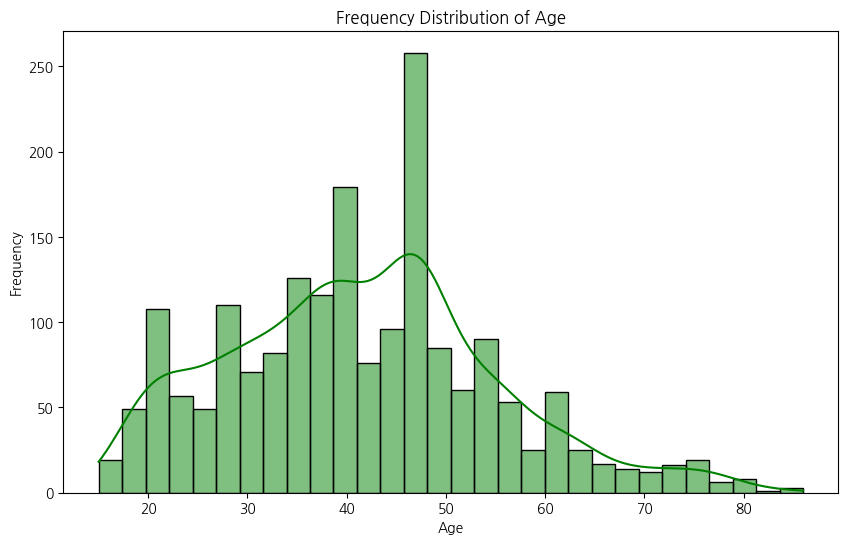

In [65]:
# 연령 칼럼 도수분포 그래프 확인
plt.figure(figsize=(10, 6))
sns.histplot(df_derive['연령'], kde=True, bins=30, color='green')
plt.title('Frequency Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [66]:
# 연령대 범주 설정
bins = [0, 29, 49, 69, 100]  # 0~29, 30~49, 50~69, 70~100
labels = ['10-20대', '30-40대', '50-60대', '70대 이상']

# '연령' 칼럼을 범주형으로 변환
df_derive['연령대'] = pd.cut(df_derive['연령'], bins=bins, labels=labels, right=False)

# 결과 확인
df_derive[['연령', '연령대']].head()

,연령,연령대
0,34,30-40대
1,19,10-20대
2,28,10-20대
3,22,10-20대
4,50,50-60대


### 2) T-score
T-score criteria 에 따른 범주형 변수 'T-score' 생성  
  
* T-score ≤ -2.5 (골다공증), -2.5 < T-score < -1.0 (골감소증), T-score ≥ -1 (정상). 
* WHO의 T-score criteria에 따라 골밀도 검사 상 T-score≥-1인 경우 정상, -2.5<T-score<-1.0 경우 7 골감소증, T-score≤-2.5인 경우 골다공증으로 구분

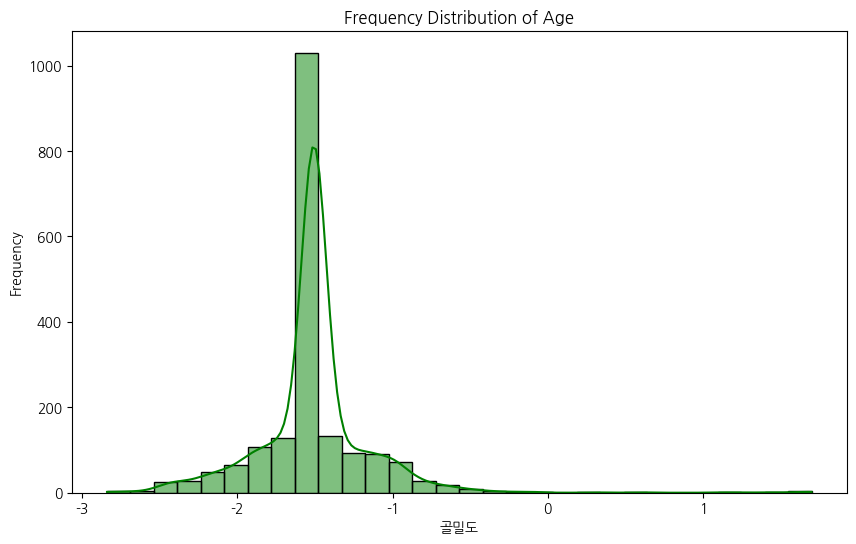

In [67]:
# 골밀도 칼럼 도수분포 그래프 확인
plt.figure(figsize=(10, 6))
sns.histplot(df_derive['골밀도'], kde=True, bins=30, color='green')
plt.title('Frequency Distribution of Age')
plt.xlabel('골밀도')
plt.ylabel('Frequency')
plt.show()

In [68]:
# T-score 범주 설정
bins = [-float('inf'), -2.5, -1, float('inf')]  # T-score 구간 설정
labels = ['골다공증', '골감소증', '정상']  # T-score 레이블 설정

# '골밀도' 칼럼을 범주형으로 변환
df_derive['T-score'] = pd.cut(df_derive['골밀도'], bins=bins, labels=labels, right=False)

# 결과 확인
df_derive[['골밀도', 'T-score']].head()

,골밀도,T-score
0,-1.507325,골감소증
1,-1.507325,골감소증
2,-1.507325,골감소증
3,-1.507325,골감소증
4,-1.507325,골감소증


### 3) 수술 받은 계절 
수술일을 통해 범주형 변수 '수술 받은 계절' 생성  
* 12-2월 : 겨울, 3-5월 : 봄, 6-8월 : 여름, 9-11월 : 가을

In [69]:
# '수술일' 칼럼에서 월 정보를 추출하는 함수 정의
def get_season(date):
    month = pd.to_datetime(date).month  # '수술일'에서 월 정보 추출
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:  # 12, 1, 2월
        return '겨울'

# '수술 받은 계절' 칼럼 생성
df_derive['수술 받은 계절'] = df_derive['수술일'].apply(get_season)

# 결과 확인
df_derive[['수술일', '수술 받은 계절']].head()

,수술일,수술 받은 계절
0,2012-04-02,봄
1,2012-04-09,봄
2,2012-05-14,봄
3,2014-02-17,겨울
4,2014-03-24,봄


### 4) BMI 
신장, 체중을 통해, BMI 에 따른 연속형 변수 'BMI' 생성 

In [70]:
# BMI 계산 및 'BMI' 칼럼 생성
df_derive['BMI'] = df_derive['체중'] / ((df_derive['신장'] / 100) ** 2)

# 결과 확인
df_derive[['신장', '체중', 'BMI']].head()

,신장,체중,BMI
0,174,75.0,24.772097
1,172,70.0,23.661439
2,177,68.0,21.705129
3,172,70.0,23.661439
4,166,77.0,27.943098


### 5) df_derive에 파생 변수 유도 변수 및 분석에서 사용 제외되는 변수 제거

In [71]:
df_derive = df_derive.drop('연령', axis=1)
df_derive = df_derive.drop('신장', axis=1)
df_derive = df_derive.drop('체중', axis=1)
df_derive = df_derive.drop('수술일', axis=1)
df_derive = df_derive.drop('입원일', axis=1)
df_derive = df_derive.drop('퇴원일', axis=1)
df_derive = df_derive.drop('골밀도', axis=1)
df_derive.head(3)

,환자ID,수술기법,수술시간,수술실패여부,재발여부,헤모글로빈수치,환자통증정도,통증기간(월),혈액형,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,성별,스테로이드치료,신부전여부,심혈관질환,암발병여부,우울증여부,입원기간,종양진행여부,직업,혈전합병증여부,흡연여부,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대,T-score,수술 받은 계절,BMI
0,1052PT,TELD,30.0,0,0,15.1,7,0.2,RH+O,10.5,2,44.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,사무직,0,1,13.3,11.7,318.6,0,2425.8,0,49.7,27.6,1.2,0,2155.3,4,Middle,0,30-40대,골감소증,봄,24.772097
1,1056PT,TELD,70.0,0,0,16.0,7,5.0,RH+O,46.7,3,21.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,군인,0,0,17.2,8.3,153.7,0,2677.2,0,36.3,4.5,7.3,0,2143.1,4,Middle,0,10-20대,골감소증,봄,23.661439
2,1093PT,TELD,45.0,0,0,15.0,5,24.0,RH+A,30.1,3,13.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,Unknown,0,0,10.0,6.9,117.0,0,1704.0,0,41.3,17.4,13.4,0,1868.7,4,Down,0,10-20대,골감소증,봄,21.705129


### 6) 원본 데이터(df)와 파생변수 데이터(df_derive) 비교

In [72]:
print(df.info())
print('*'*20)
print(df_derive.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1889 entries, 0 to 1893
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1889 non-null   object 
 1   수술기법                    1889 non-null   object 
 2   수술시간                    1889 non-null   float64
 3   수술실패여부                  1889 non-null   int64  
 4   신장                      1889 non-null   int64  
 5   연령                      1889 non-null   int64  
 6   재발여부                    1889 non-null   int64  
 7   체중                      1889 non-null   float64
 8   헤모글로빈수치                 1889 non-null   float64
 9   환자통증정도                  1889 non-null   int64  
 10  통증기간(월)                 1889 non-null   float64
 11  혈액형                     1889 non-null   object 
 12  입원일                     1889 non-null   object 
 13  퇴원일                     1889 non-null   object 
 14  수술일                     1889 non-null   objec

In [73]:
df_derive.to_csv('processed_data.csv', index=False)

# 3. EDA & 통계적 검정

In [74]:
df1 = df.copy()

In [75]:
numeric_col=df.select_dtypes(exclude='object').columns
numeric_col
binary = ['수술실패여부', '재발여부', '퇴원일', '수술일', 'Location of herniation', '가족력', '간질성폐질환',
          '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
          '심혈관질환', '암발병여부', '우울증여부', '입원기간', '종양진행여부', '혈전합병증여부', '흡연여부', 'Instability',
          'Modic change', 'Vaccum disc', '디스크위치', '척추전방위증', '입원일수', 'T-score', '과거수술여부', '월_금']
filtered_list = [item for item in numeric_col if item not in binary]

## 3.1 특정 변수에 따른 수술실패여부의 차이 검정 
### 1) Man whitney_U 검정
수술 성공 집단과 실패 집단의 연속형 변수에 대한 평균차이 검정

In [76]:
meaning_true = []
from scipy import stats
for col in filtered_list:

    group1 = df[df['수술실패여부']==0][col]
    group2 = df[df['수술실패여부']==1][col]

    # 맨-휘트니 U 검정 수행
    u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    # 결과 출력
    print()
    print('수술실패여부에 따른', col, '의 평균차이')
    print(f'U-Statistic: {u_statistic}')
    print(f'P-Value: {p_value}')
    if p_value < 0.05:
        print('두집단 간의 분포에 차이가 있다. (O)')
        print()
        print('*'*100)
        meaning_true.append(col)
    else:
        print('두집단 간의 분포에 차이가 없다. (X)')
        print()
        print('*'*100)


수술실패여부에 따른 수술시간 의 평균차이
U-Statistic: 97065.0
P-Value: 0.38325662145340456
두집단 간의 분포에 차이가 없다. (X)

****************************************************************************************************

수술실패여부에 따른 신장 의 평균차이
U-Statistic: 99122.5
P-Value: 0.6109538314595028
두집단 간의 분포에 차이가 없다. (X)

****************************************************************************************************

수술실패여부에 따른 연령 의 평균차이
U-Statistic: 85064.0
P-Value: 0.002793096255826099
두집단 간의 분포에 차이가 있다. (O)

****************************************************************************************************

수술실패여부에 따른 체중 의 평균차이
U-Statistic: 94100.5
P-Value: 0.1631443452483764
두집단 간의 분포에 차이가 없다. (X)

****************************************************************************************************

수술실패여부에 따른 헤모글로빈수치 의 평균차이
U-Statistic: 102725.5
P-Value: 0.898922232412995
두집단 간의 분포에 차이가 없다. (X)

****************************************************************************************************

수술실패여부에 따

### 2) 카이제곱 검정
범주형 변수와 수술 실패여부의 연관성을 확인하는 검정

In [77]:
binary1 = ['Location of herniation', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부',
           '빈혈여부', '성별', '스테로이드치료', '신부전여부', '심혈관질환', '암발병여부', '우울증여부', '입원기간', '종양진행여부',
           '혈전합병증여부', '흡연여부', 'Instability', 'Modic change', 'Vaccum disc', '디스크위치', '척추전방위증', '과거수술횟수'] 

for col in binary1:

    contingency_table = pd.crosstab(df['수술실패여부'], df[col])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table )

    # 결과 출력
    print()
    print('수술실패여부에 따른', col, '의 차이')
    print(f'Chi-Statistic: {chi2_stat}')
    print(f'P-Value: {p_val}')
    if p_value < 0.05:
        print('두 변수 간 차이가 있다. (O)')
        print()
        print('*'*100)
        meaning_true.append(col)
    else:
        print('두 변수 간 차이가 없다. (X)')
        print()
        print('*'*100)


수술실패여부에 따른 Location of herniation 의 차이
Chi-Statistic: 8.96900513669931
P-Value: 0.06187889143524695
두 변수 간 차이가 있다. (O)

****************************************************************************************************

수술실패여부에 따른 가족력 의 차이
Chi-Statistic: 0.16157557124467078
P-Value: 0.6877100501628721
두 변수 간 차이가 있다. (O)

****************************************************************************************************

수술실패여부에 따른 간질성폐질환 의 차이
Chi-Statistic: 0.0
P-Value: 1.0
두 변수 간 차이가 있다. (O)

****************************************************************************************************

수술실패여부에 따른 고혈압여부 의 차이
Chi-Statistic: 0.5207019870270334
P-Value: 0.47054238785249813
두 변수 간 차이가 있다. (O)

****************************************************************************************************

수술실패여부에 따른 과거수술횟수 의 차이
Chi-Statistic: 9.61482949473498
P-Value: 0.022140628479541596
두 변수 간 차이가 있다. (O)

***********************************************************************************

In [78]:
df1['수술실패여부'] = df1['수술실패여부'].replace({0: '수술O', 1: '수술X'})
df1['수술일'] = pd.to_datetime(df1['수술일'])
df1['수술_weekday'] = df1['수술일'].dt.weekday

<Axes: xlabel='수술_weekday', ylabel='count'>

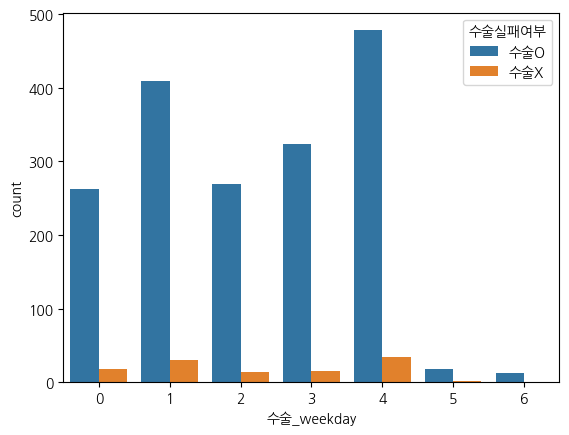

In [79]:
sns.countplot(x=df1['수술_weekday'], hue = df1['수술실패여부'])

0(월), 5(토), 6(일)은 수술 실패 횟수가 적어, 제거함.

In [80]:
contingency_table = pd.crosstab(df1['수술실패여부'], df1['수술_weekday'])
contingency_table.drop(columns=[0, 5, 6],inplace=True)
contingency_table

수술_weekday,1,2,3,4
수술실패여부,,,,
수술O,409,270,324,478
수술X,31,14,16,34


In [81]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table )

print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)

카이제곱 통계량: 2.797438238410942
p-value: 0.42392180226725507


## 3.3 특정 변수에 따른 재발 여부의 차이 검정 
### 1) Man whitney_U 검정
재발 집단과 재발하지 않은 집단의 연속형 변수에 대한 평균차이 검정

In [82]:
meaning_true = []
from scipy import stats
for col in filtered_list:

    group1 = df[df['재발여부']==0][col]
    group2 = df[df['재발여부']==1][col]

    # 맨-휘트니 U 검정 수행
    u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    # 결과 출력
    print('재발여부에 따른', col, '의 평균차이')
    print(f'U-Statistic: {u_statistic}')
    print(f'P-Value: {p_value}')
    if p_value < 0.05:
        print('두집단 간의 분포에 차이가 있다. (O)')
        print()
        print('*'*100)
        meaning_true.append(col)
    else:
        print('두집단 간의 분포에 차이가 없다. (X)')
        print()
        print('*'*100)

재발여부에 따른 수술시간 의 평균차이
U-Statistic: 176594.5
P-Value: 0.2306448072165701
두집단 간의 분포에 차이가 없다. (X)

****************************************************************************************************
재발여부에 따른 신장 의 평균차이
U-Statistic: 165514.5
P-Value: 0.008098049216150573
두집단 간의 분포에 차이가 있다. (O)

****************************************************************************************************
재발여부에 따른 연령 의 평균차이
U-Statistic: 168083.0
P-Value: 0.020803559006638626
두집단 간의 분포에 차이가 있다. (O)

****************************************************************************************************
재발여부에 따른 체중 의 평균차이
U-Statistic: 141083.5
P-Value: 5.185581966659166e-09
두집단 간의 분포에 차이가 있다. (O)

****************************************************************************************************
재발여부에 따른 헤모글로빈수치 의 평균차이
U-Statistic: 167381.0
P-Value: 0.016281331629389172
두집단 간의 분포에 차이가 있다. (O)

****************************************************************************************************
재발여부에 따른 환자통증정

### 2) 카이제곱 검정
범주형 변수와 재발여부의 연관성을 확인하는 검정

In [83]:
for col in binary1:

    contingency_table = pd.crosstab(df['재발여부'], df[col])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table )

    # 결과 출력
    print()
    print('재발여부에 따른', col, '의 차이')
    print(f'Chi-Statistic: {chi2_stat}')
    print(f'P-Value: {p_val}')
    if p_value < 0.05:
        print('두 변수 간 차이가 있다. (O)')
        print()
        print('*'*100)
        meaning_true.append(col)
    else:
        print('두 변수 간 차이가 없다. (X)')
        print()
        print('*'*100)


재발여부에 따른 Location of herniation 의 차이
Chi-Statistic: 6.742177692106844
P-Value: 0.15015657377506456
두 변수 간 차이가 있다. (O)

****************************************************************************************************

재발여부에 따른 가족력 의 차이
Chi-Statistic: 0.04484256767081684
P-Value: 0.8322937786400645
두 변수 간 차이가 있다. (O)

****************************************************************************************************

재발여부에 따른 간질성폐질환 의 차이
Chi-Statistic: 1.046302491079007
P-Value: 0.30636019584748264
두 변수 간 차이가 있다. (O)

****************************************************************************************************

재발여부에 따른 고혈압여부 의 차이
Chi-Statistic: 9.384996979780931
P-Value: 0.0021876841392239766
두 변수 간 차이가 있다. (O)

****************************************************************************************************

재발여부에 따른 과거수술횟수 의 차이
Chi-Statistic: 4.803630045673407
P-Value: 0.1867541256367953
두 변수 간 차이가 있다. (O)

**************************************************************

BMI(환자분류)에 따른 재발여부, 직업에 따른 재발여부의 연관성에 대한 검정
* BMI, 직업에 따른 재발여부는 차이가 있다.  

In [84]:
df1.loc[df_derive['BMI'] <= 18.5, ['환자분류']] = '저체중'
df1.loc[(df_derive['BMI'] > 18.5) & (df_derive['BMI'] <= 23), ['환자분류']] = '정상'
df1.loc[(df_derive['BMI'] > 23) & (df_derive['BMI'] <= 25), ['환자분류']] = '과체중'
df1.loc[(df_derive['BMI'] > 25) & (df_derive['BMI'] <= 30), ['환자분류']] = '비만'
df1.loc[(df_derive['BMI'] > 30), ['환자분류']] = '고도비만'
df1['재발여부'] = df1['재발여부'].replace({0: '재발X', 1: '재발O'})

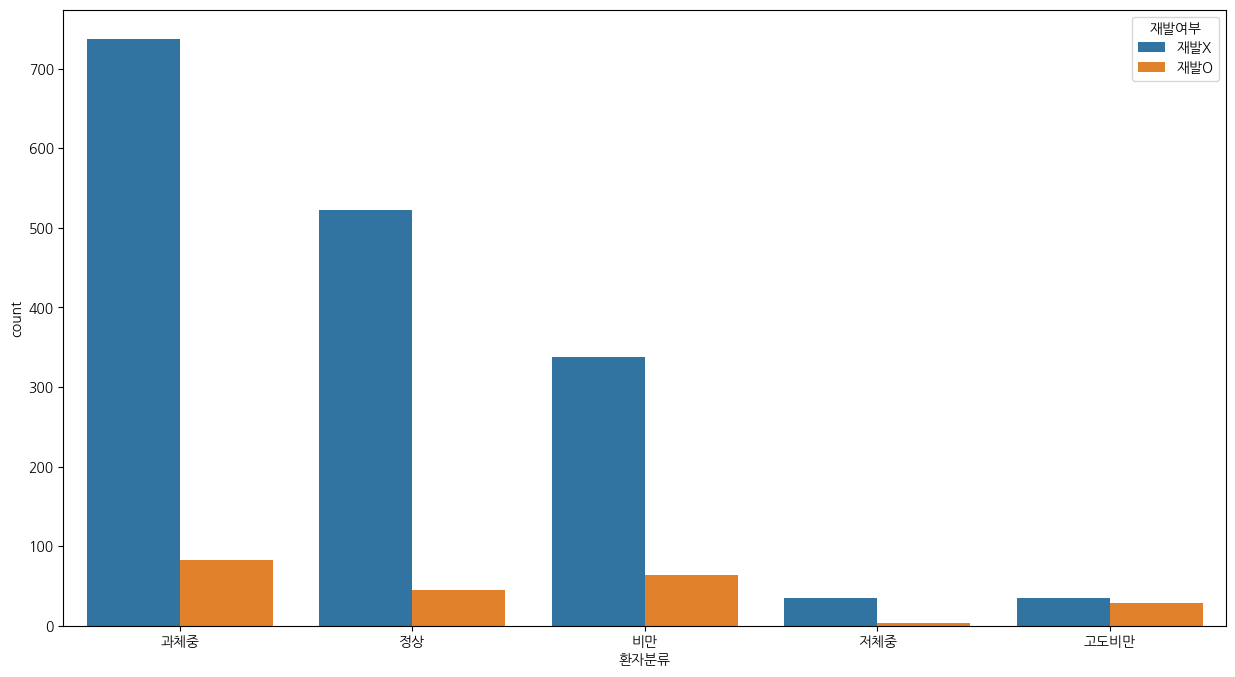

In [85]:
plt.figure(figsize=(15,8))
sns.countplot(x=df1['환자분류'], hue=df1['재발여부'])
plt.show()

In [86]:
contingency_table = pd.crosstab(df1['재발여부'], df1['환자분류'])
contingency_table

환자분류,고도비만,과체중,비만,저체중,정상
재발여부,,,,,
재발O,28,83,64,3,45
재발X,35,737,337,35,522


In [87]:
# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table )
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)

카이제곱 통계량: 82.05136093050612
p-value: 6.401593775113287e-17


---

직업에 따른 재발여부

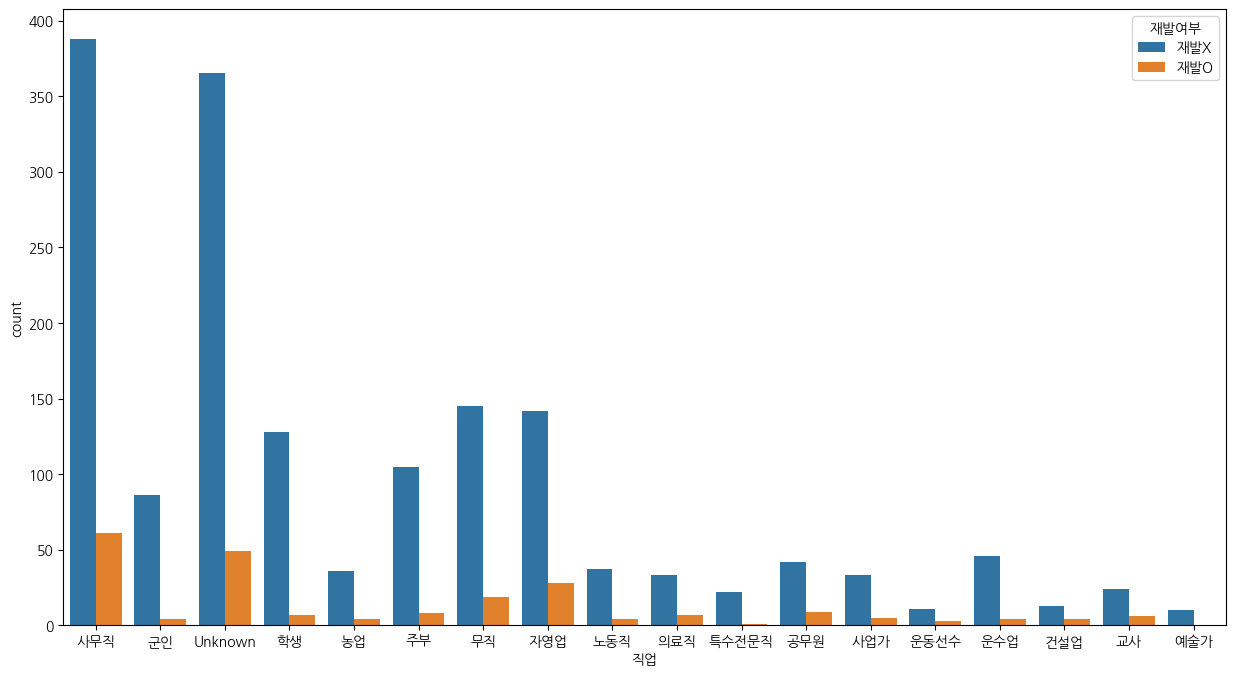

In [88]:
plt.figure(figsize=(15,8))
sns.countplot(x=df1['직업'], hue=df1['재발여부'])
plt.show()

In [89]:
contingency_table = pd.crosstab(df1['재발여부'], df1['직업'])
contingency_table

직업,Unknown,건설업,공무원,교사,군인,노동직,농업,무직,사무직,사업가,예술가,운동선수,운수업,의료직,자영업,주부,특수전문직,학생
재발여부,,,,,,,,,,,,,,,,,,
재발O,49,4,9,6,4,4,4,19,61,5,0,3,4,7,28,8,1,7
재발X,365,13,42,24,86,37,36,145,388,33,10,11,46,33,142,105,22,128


In [90]:
# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table )
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)

카이제곱 통계량: 29.68080107310596
p-value: 0.02874106862709254


## 4) 특정 변수간의 연관성 파악

In [91]:
df1.loc[df1['연령']<20, ['연령대']]='10대'
df1.loc[(df1['연령']>=20)&(df1['연령']<40), ['연령대']]='20,30대'
df1.loc[(df1['연령']>=40)&(df1['연령']<60), ['연령대']]='40,50대'
df1.loc[(df1['연령']>=60), ['연령대']]='60대 이상'

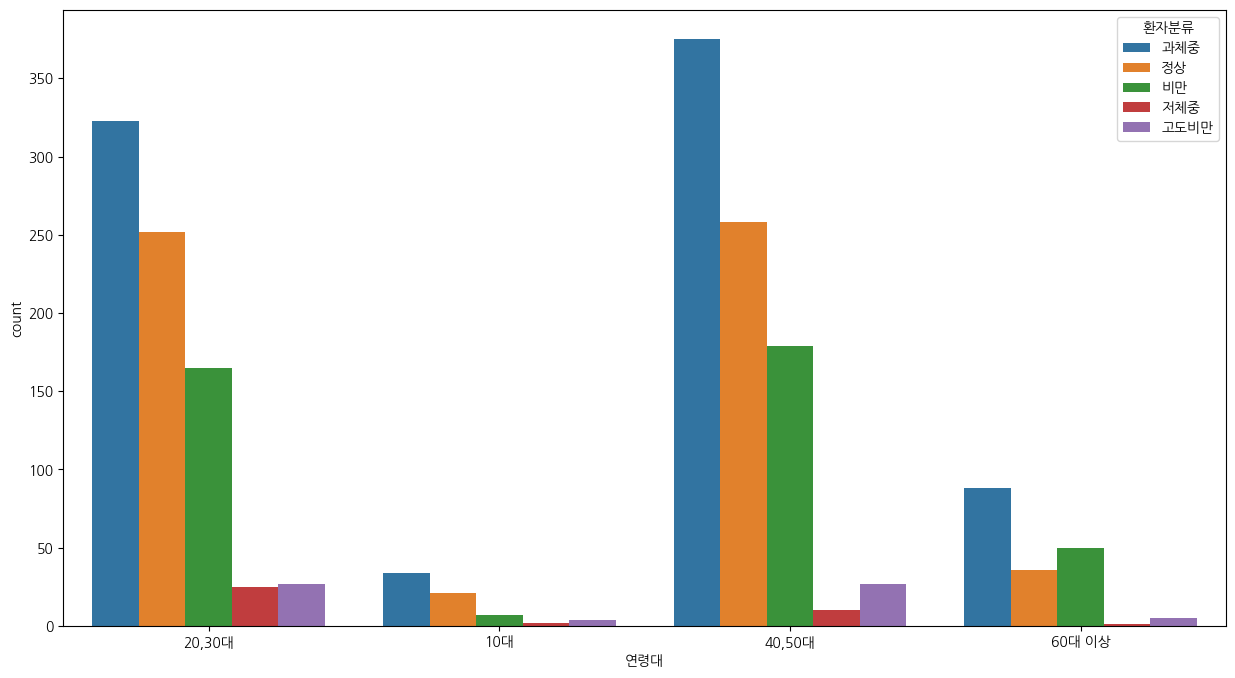

In [92]:
plt.figure(figsize=(15,8))
sns.countplot(x=df1['연령대'], hue=df1['환자분류'])
plt.show()

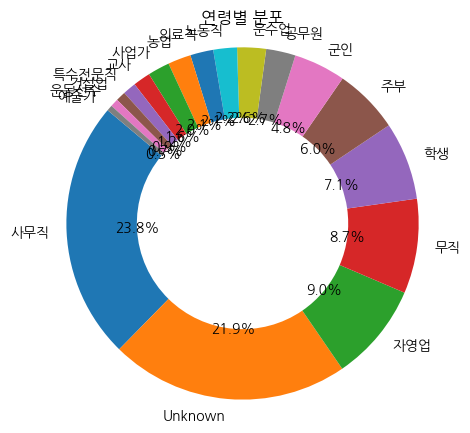

In [93]:
age_counts = df1['직업'].value_counts()

# 도넛 차트 그리기
plt.figure(figsize=(5, 5))  # 차트의 크기 설정
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('연령별 분포')  # 차트 제목 설정
plt.axis('equal')  # 차트를 원형으로 만듦
plt.show()